In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load datasets
deliveries_file_path = '/content/deliveries.csv'
matches_file_path = '/content/matches.csv'

In [3]:
deliveries_df = pd.read_csv('/content/deliveries.csv')
matches_df = pd.read_csv('/content/matches.csv')

In [4]:
# Initial overview of the datasets
print("Matches Dataset Info:")
print(matches_df.info())
print("\nDeliveries Dataset Info:")
print(deliveries_df.info())

Matches Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   objec

In [5]:
# Analyzing Team Performance
team_wins = matches_df['winner'].value_counts()
print("\nTeam Wins:")
print(team_wins)


Team Wins:
winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Lucknow Super Giants            24
Punjab Kings                    24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


In [6]:
# Calculate Win Percentages
total_matches = matches_df['id'].nunique()
matches_df['win_percentage'] = (matches_df['winner'].value_counts() / total_matches) * 100
print("\nWin Percentages:")
print(matches_df[['winner', 'win_percentage']].drop_duplicates())


Win Percentages:
                           winner  win_percentage
0           Kolkata Knight Riders             NaN
1             Chennai Super Kings             NaN
2                Delhi Daredevils             NaN
3     Royal Challengers Bangalore             NaN
5                Rajasthan Royals             NaN
9                 Kings XI Punjab             NaN
12                Deccan Chargers             NaN
15                 Mumbai Indians             NaN
179                 Pune Warriors             NaN
187          Kochi Tuskers Kerala             NaN
241                           NaN             NaN
324           Sunrisers Hyderabad             NaN
517       Rising Pune Supergiants             NaN
519                 Gujarat Lions             NaN
578        Rising Pune Supergiant             NaN
698                Delhi Capitals             NaN
819                  Punjab Kings             NaN
879                Gujarat Titans             NaN
882          Lucknow Super Giant

In [7]:
# Player of the Match Analysis
player_of_match_counts = matches_df['player_of_match'].value_counts()
print("\nPlayer of the Match Awards:")
print(player_of_match_counts)


Player of the Match Awards:
player_of_match
AB de Villiers       25
CH Gayle             22
RG Sharma            19
DA Warner            18
V Kohli              18
                     ..
NV Ojha               1
KV Sharma             1
Washington Sundar     1
PD Collingwood        1
Shahbaz Ahmed         1
Name: count, Length: 291, dtype: int64


In [8]:
# Average Runs Scored Analysis
average_runs = deliveries_df.groupby('match_id')['total_runs'].sum().mean()
print("\nAverage Runs Scored Per Match:")
print(average_runs)


Average Runs Scored Per Match:
317.5853881278539


In [9]:
# Correlation Analysis (Runs vs Wickets per Match)
runs_vs_wickets = deliveries_df.groupby('match_id').agg({'total_runs': 'sum', 'is_wicket': 'sum'})
correlation = runs_vs_wickets['total_runs'].corr(runs_vs_wickets['is_wicket'])
print("\nCorrelation Between Total Runs and Wickets:")
print(correlation)


Correlation Between Total Runs and Wickets:
-0.12966657382886285


<ipython-input-10-5f6a3a8c34ab>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wins.index, y=team_wins.values, palette='viridis')


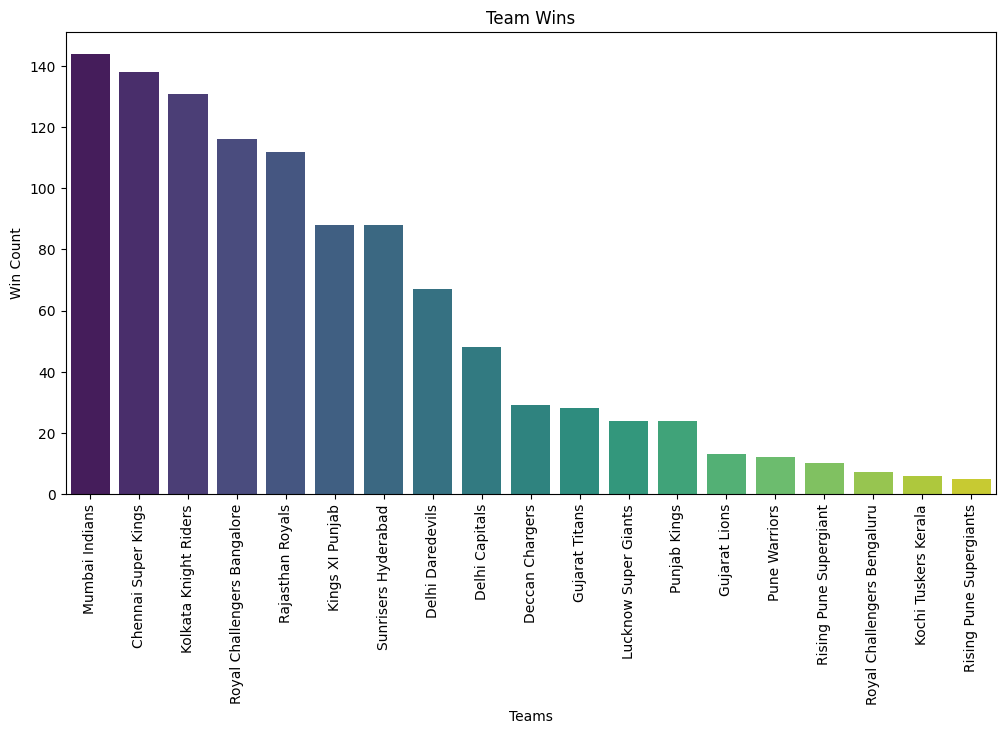

In [10]:
# Visualizations
# Team Wins Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=team_wins.index, y=team_wins.values, palette='viridis')
plt.title('Team Wins')
plt.xlabel('Teams')
plt.ylabel('Win Count')
plt.xticks(rotation=90)
plt.show()


<ipython-input-11-282cb133c334>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=player_of_match_counts.head(10).index, y=player_of_match_counts.head(10).values, palette='magma')


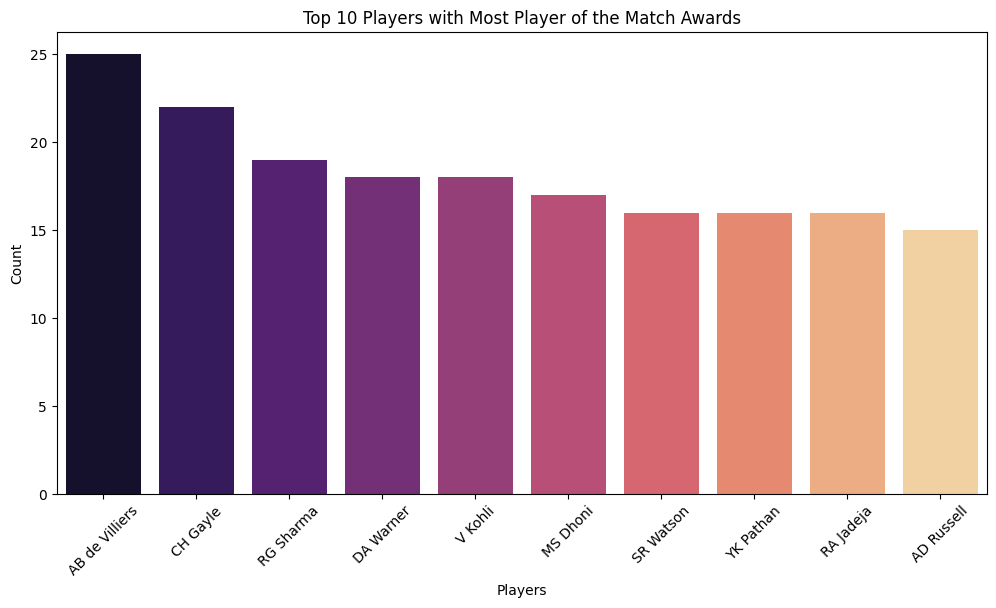

In [11]:
# Player of the Match Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=player_of_match_counts.head(10).index, y=player_of_match_counts.head(10).values, palette='magma')
plt.title('Top 10 Players with Most Player of the Match Awards')
plt.xlabel('Players')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-12-68fcfcd1d10c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toss_wins.index, y=toss_wins.values, palette='coolwarm')


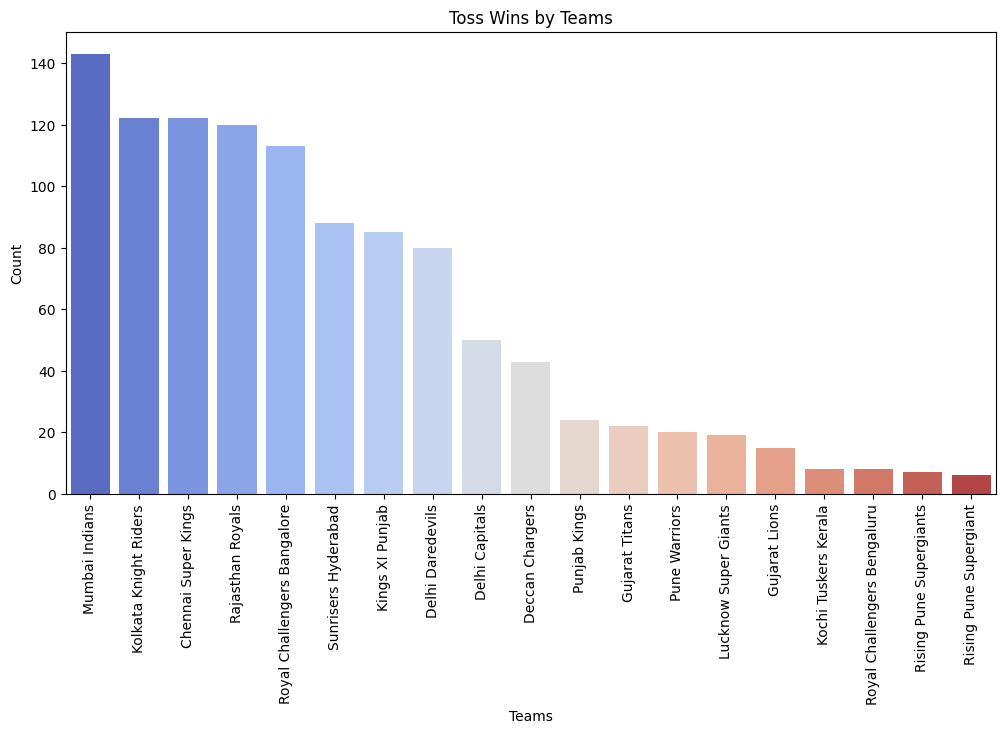

In [12]:
# Toss Win Analysis
toss_wins = matches_df['toss_winner'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=toss_wins.index, y=toss_wins.values, palette='coolwarm')
plt.title('Toss Wins by Teams')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [13]:
# Home Advantage Analysis
matches_df['is_home_team'] = matches_df['team1'] == matches_df['venue']
home_wins = matches_df[matches_df['winner'] == matches_df['team1']]['is_home_team'].sum()
print("\nNumber of Matches Won by Home Teams:")
print(home_wins)


Number of Matches Won by Home Teams:
0


<ipython-input-14-d09ad8bf7413>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome_trends.index, y=outcome_trends.values, palette='Set2')


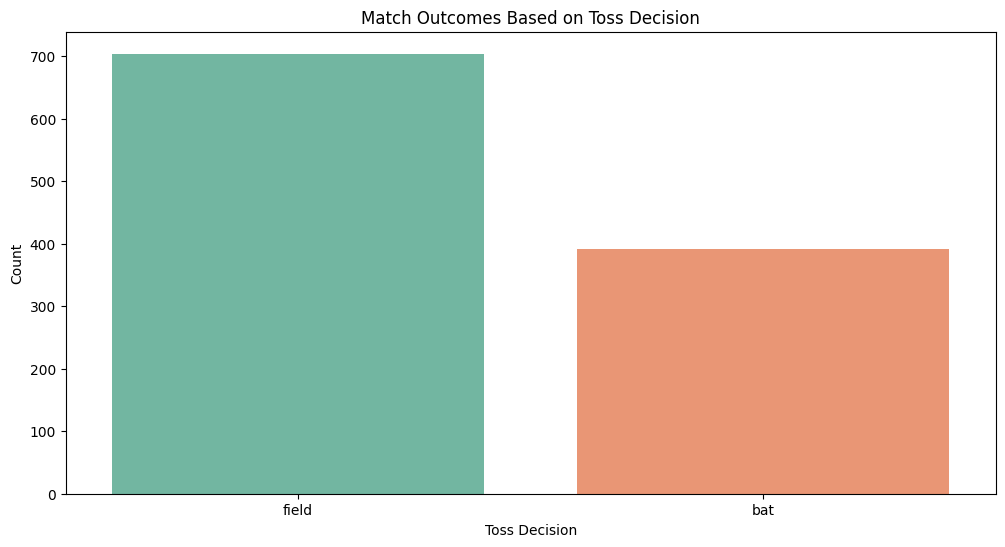

In [14]:
# Match Outcome Trends (Wins by Batting/Bowling First)
outcome_trends = matches_df['toss_decision'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=outcome_trends.index, y=outcome_trends.values, palette='Set2')
plt.title('Match Outcomes Based on Toss Decision')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.show()
